In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [68]:
def fillMissingData(X, column):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,column:column + 1] = imputer.fit_transform(X[:,column:column + 1])
    return X

In [69]:
df = pd.read_csv('data\svbr.csv', delimiter=';')

df.head()

,Canal,Inscritos,Visualizações
0,Site Arqueologia Egípcia,13438.0,406590.0
1,Terra Negra,35241.0,868235.0
2,Frank Jaava,31680.0,2856508.0
3,Dispersciência,25100.0,150000.0
4,Olá Ciência,32788.0,1575456.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Canal          47 non-null     object 
 1   Inscritos      46 non-null     float64
 2   Visualizações  46 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [71]:
#pré-processamento
df_numpy = fillMissingData(df.to_numpy(), 1)
df_numpy[:, 1] = df_numpy[:, 1].astype("int")
df_numpy = fillMissingData(df_numpy, 2)
df_numpy[:, 2] = df_numpy[:, 2].astype("int")

#atualiza peixe babel
df.at[28, 'Inscritos'] = df_numpy[28][1]
df.at[28, 'Visualizações'] = df_numpy[28][2]

#converte inscritos e visualizações para inteiro
df.Inscritos = df.Inscritos.astype("int")
df.Visualizações = df.Visualizações.astype("int")

X = pd.DataFrame({'Inscritos': df_numpy[:, 1], 'Visualizações': df_numpy[:, 2]})
X.head()

,Inscritos,Visualizações
0,13438,406590
1,35241,868235
2,31680,2856508
3,25100,150000
4,32788,1575456


# K-means

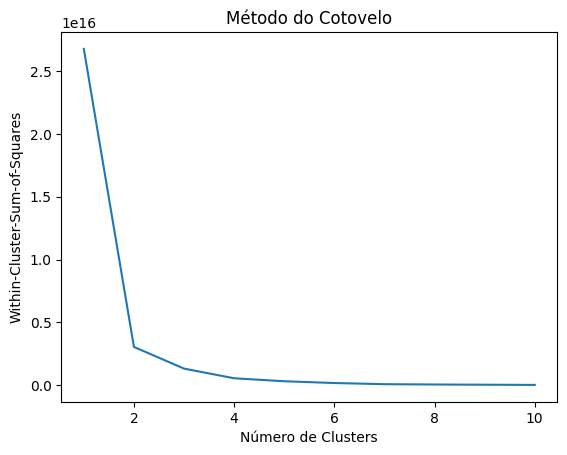

In [72]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares")
plt.show()

# K = 2

In [73]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10)
clusters = kmeans.fit_predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [74]:
df['Cluster'] = clusters

In [75]:
boolArray = df['Cluster'] == 0
df[boolArray]

,Canal,Inscritos,Visualizações,Cluster
0,Site Arqueologia Egípcia,13438,406590,0
1,Terra Negra,35241,868235,0
2,Frank Jaava,31680,2856508,0
3,Dispersciência,25100,150000,0
4,Olá Ciência,32788,1575456,0
5,A matemaníaca por Julia Jaccoud,65453,1667892,0
6,Delta T - Os super lentos,12000,171361,0
7,Bláblálogia,161951,11027386,0
8,Efarsas,78876,6226235,0
9,Minuto da Terra,274196,30166457,0


In [76]:
boolArray = df['Cluster'] == 1
df[boolArray]

,Canal,Inscritos,Visualizações,Cluster
18,Matemática Rio com Prof Rafael Procópio,1423056,93036517,1
32,Canal do Pirula,752573,76462787,1
39,Schwarza - Poligonautas,860493,118741623,1


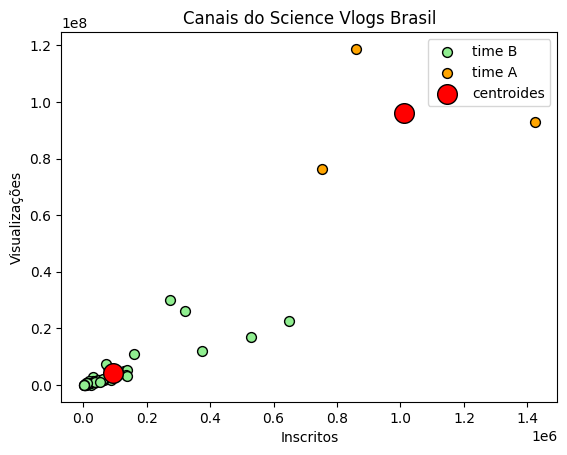

In [77]:
x = X.to_numpy()

plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='time B'
)

plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='time A'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='red', edgecolor='black',
    label='centroides'
)
plt.title("Canais do Science Vlogs Brasil")
plt.xlabel("Inscritos")
plt.ylabel("Visualizações")

plt.legend()
plt.show()

# K = 3

In [78]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10)
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters
df.head()

,Canal,Inscritos,Visualizações,Cluster
0,Site Arqueologia Egípcia,13438,406590,0
1,Terra Negra,35241,868235,0
2,Frank Jaava,31680,2856508,0
3,Dispersciência,25100,150000,0
4,Olá Ciência,32788,1575456,0


In [79]:
boolArray = df['Cluster'] == 1
df[boolArray]

,Canal,Inscritos,Visualizações,Cluster
18,Matemática Rio com Prof Rafael Procópio,1423056,93036517,1
32,Canal do Pirula,752573,76462787,1
39,Schwarza - Poligonautas,860493,118741623,1


In [80]:
boolArray = df['Cluster'] == 2
df[boolArray]

,Canal,Inscritos,Visualizações,Cluster
9,Minuto da Terra,274196,30166457,2
23,Minutos Psíquicos,648892,22555134,2
29,SpaceToday,321068,26277335,2
30,Ciência todo dia,528761,16969332,2


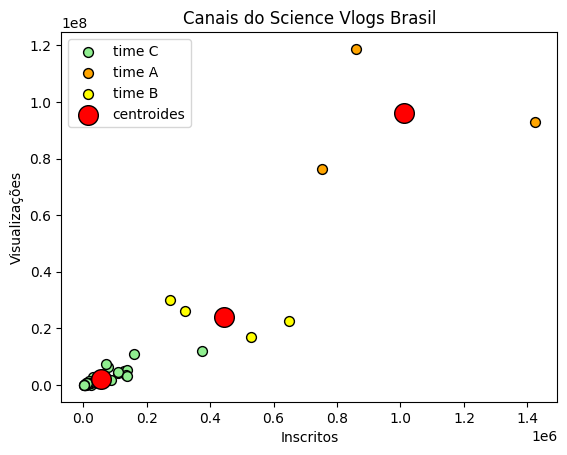

In [81]:
x = X.to_numpy()

plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='time C'
)

plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='time A'
)

plt.scatter(
    x[clusters == 2, 0], x[clusters == 2, 1],
    s=50, c='yellow',
    edgecolor='black',
    label='time B'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='red', edgecolor='black',
    label='centroides'
)

plt.title("Canais do Science Vlogs Brasil")
plt.xlabel("Inscritos")
plt.ylabel("Visualizações")

plt.legend()
plt.show()

# Clusterização Hierárquica

## Dendrograma

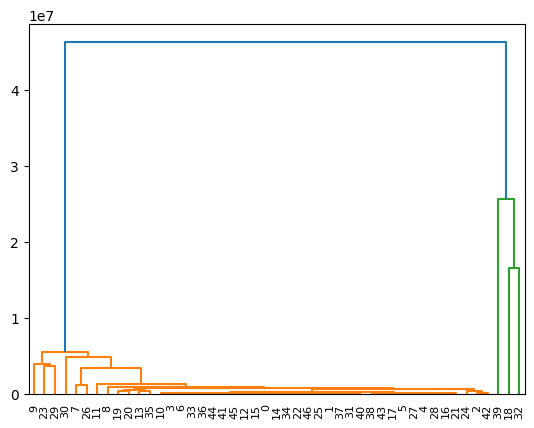

In [82]:
from scipy.cluster.hierarchy import dendrogram, linkage,ward

#linkage realiza clusterização hierárquica a fim de se construir um dendrograma
dendrogram(linkage(x))
plt.show()

In [97]:
Z = linkage(X,method="ward")
Z.shape

(46, 4)

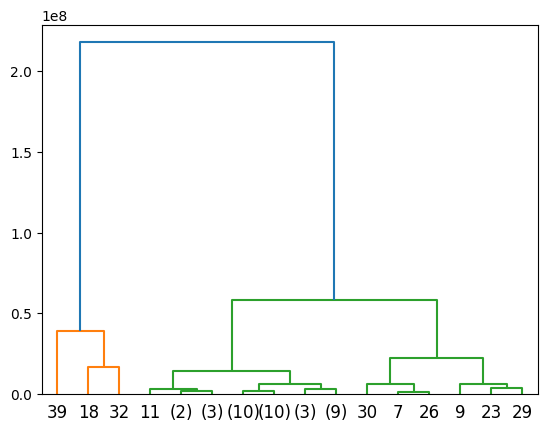

In [99]:
#linkage realiza clusterização hierárquica a fim de se construir um dendrograma
dendrogram(Z,truncate_mode='level', p=4)
plt.show()

In [96]:
Z

array([[1.20000000e+01, 1.50000000e+01, 2.64026154e+03, 2.00000000e+00],
       [4.50000000e+01, 4.70000000e+01, 4.09017412e+03, 3.00000000e+00],
       [3.60000000e+01, 4.40000000e+01, 8.91329580e+03, 2.00000000e+00],
       [1.40000000e+01, 3.40000000e+01, 2.25712252e+04, 2.00000000e+00],
       [3.00000000e+00, 6.00000000e+00, 2.50579792e+04, 2.00000000e+00],
       [4.00000000e+00, 2.80000000e+01, 2.66528888e+04, 2.00000000e+00],
       [3.30000000e+01, 4.90000000e+01, 2.96107176e+04, 3.00000000e+00],
       [4.10000000e+01, 4.80000000e+01, 3.32491444e+04, 4.00000000e+00],
       [1.00000000e+00, 3.70000000e+01, 4.81949088e+04, 2.00000000e+00],
       [5.00000000e+00, 2.70000000e+01, 5.62092108e+04, 2.00000000e+00],
       [3.10000000e+01, 4.00000000e+01, 5.98604001e+04, 2.00000000e+00],
       [5.30000000e+01, 5.40000000e+01, 9.41139541e+04, 7.00000000e+00],
       [5.20000000e+01, 5.60000000e+01, 9.43697043e+04, 4.00000000e+00],
       [1.00000000e+01, 5.10000000e+01, 1.03348781e

## Algoritmo de Clusterização Hierárquica

In [85]:
from sklearn.cluster import AgglomerativeClustering

hc_model = AgglomerativeClustering(linkage='ward')
clusters = hc_model.fit_predict(x)

df['Cluster'] = clusters
df.head()

,Canal,Inscritos,Visualizações,Cluster
0,Site Arqueologia Egípcia,13438,406590,0
1,Terra Negra,35241,868235,0
2,Frank Jaava,31680,2856508,0
3,Dispersciência,25100,150000,0
4,Olá Ciência,32788,1575456,0


In [86]:
X.shape

(47, 2)

In [87]:
clusters.shape

(47,)

In [88]:
boolArray = df['Cluster'] == 1
df[boolArray]

,Canal,Inscritos,Visualizações,Cluster
18,Matemática Rio com Prof Rafael Procópio,1423056,93036517,1
32,Canal do Pirula,752573,76462787,1
39,Schwarza - Poligonautas,860493,118741623,1


In [89]:
hc_model

AgglomerativeClustering()

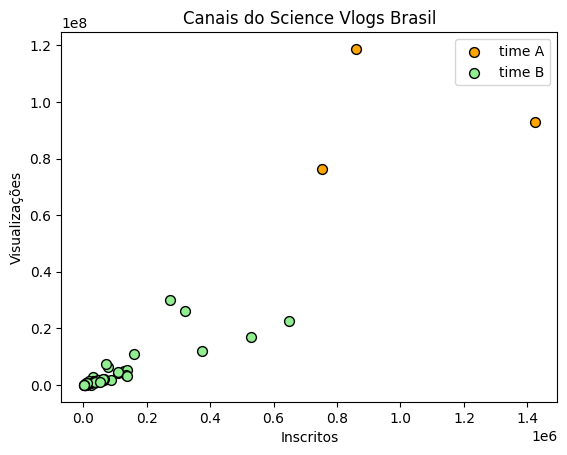

In [90]:
x = X.to_numpy()

plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='time A'
)

plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='time B'
)

plt.title("Canais do Science Vlogs Brasil")
plt.xlabel("Inscritos")
plt.ylabel("Visualizações")

plt.legend()
plt.show()

In [91]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering
#https://towardsdatascience.com/hierarchical-clustering-explained-e58d2f936323
#https://pythonprogramming.net/hierarchical-clustering-machine-learning-python-scikit-learn/
#https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/